# Differentation using numpy functions:

- **Forward differences:** np.diff( )

https://numpy.org/doc/stable/reference/generated/numpy.diff.html


- **Central differences:** np.gradient( ) along a specific axis.

https://numpy.org/doc/stable/reference/generated/numpy.gradient.html

In [1]:
import numpy as np

import matplotlib.pyplot as plt

### Example:

Find the derivative of:

$y(x) = \sin(x)$


We know that:

$y'(x) = \cos(x)$

In [2]:
# step size
h = 0.1

# define grid
x = np.arange(-2*np.pi, 2*np.pi, h) 

# compute function
y = np.sin(x) 

In [3]:
# forward differences
forward_diff = np.diff(y)/h 

# central differences
central_diff = np.gradient(y, h, axis=0)

In [4]:
print(x.shape)
print(y.shape)

print(forward_diff.shape)
print(central_diff.shape)

(126,)
(126,)
(125,)
(126,)


In [5]:
x_fdiff = x[:-1] 

In [6]:
print(x_fdiff.shape)

(125,)


In [7]:
# compute exact solution
exact_solution = np.cos(x_fdiff) 

## Plotting:

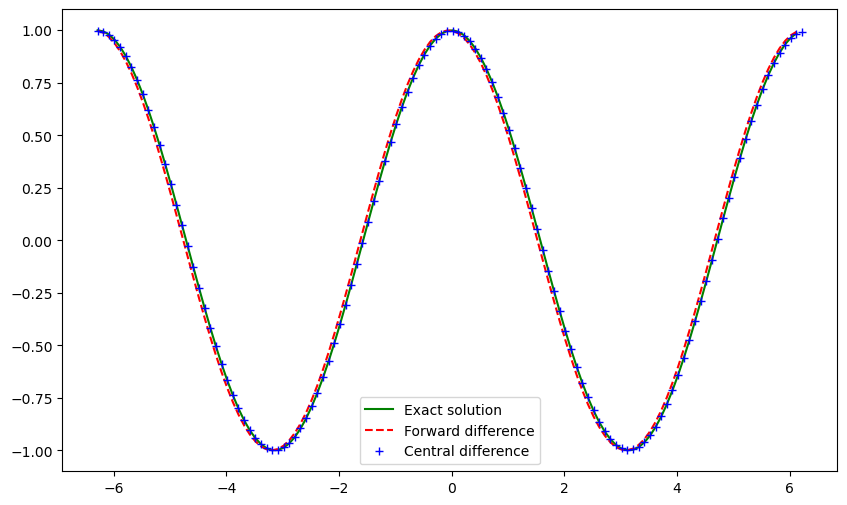

In [8]:
# Figure environment:

plt.figure(figsize = (10, 6))
plt.plot(x_fdiff, exact_solution, c = 'green', linestyle ='-', label = 'Exact solution')
plt.plot(x_fdiff, forward_diff, c = 'red', linestyle ='--', label = 'Forward difference')
plt.plot(x, central_diff, c = 'blue', marker = '+', linestyle =' ' , label = 'Central difference')
plt.legend()
plt.show()

## Iterative errors:

In [9]:
# define step size
h = 1

# define number of iterations to perform
iterations = 10

# list to store our step sizes
step_size = [] 

# list to store max error for each step size
max_error1 = [] 
max_error2 = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    
    # store this step size
    step_size.append(h) 
    
    # compute new grid
    x = np.arange(-2 * np.pi, 2 * np.pi, h) 
    
    # compute function value at grid
    y = np.sin(x) 
    
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    central_diff = np.gradient(y, h, axis=0) 
    
    # compute corresponding grid
    x_fdiff = x[:-1]
    
    # compute exact solution
    exact_solution = np.cos(x_fdiff) 
    
    # Compute max error between numerical derivative and exact solution
    max_error1.append(np.max(np.abs(exact_solution - forward_diff)))
    max_error2.append(np.max(np.abs(exact_solution - central_diff[:-1])))

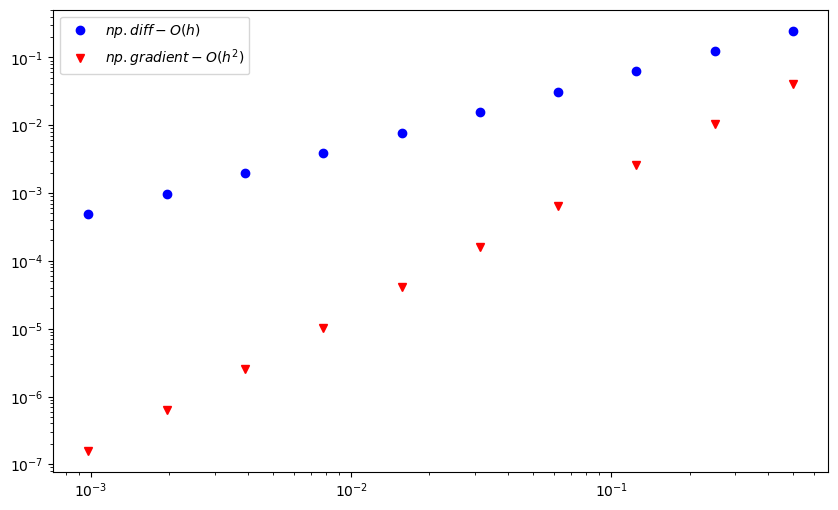

In [11]:
# produce log-log plot of max error versus step size
plt.figure(figsize = (10, 6))
plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$np.diff - O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$np.gradient - O(h^2)$')
plt.legend()
plt.show()

In [12]:
# Get coefficients

a1, b1 = np.polyfit(np.log10(step_size), np.log10(max_error1), 1)
a2, b2 = np.polyfit(np.log10(step_size), np.log10(max_error2), 1)

# Print to check
print('slope1 =', a1, ' intercept1 =', b1)
print('slope2 =', a2, ' intercept2 =', b2)

# Get fitting function
fit_max_error1 = a1*np.log10(step_size) + b1
fit_max_error2 = a2*np.log10(step_size) + b2

slope1 = 0.9992185770815306  intercept1 = -0.30279423818019946
slope2 = 1.9987853026261866  intercept2 = -0.7808863771517519


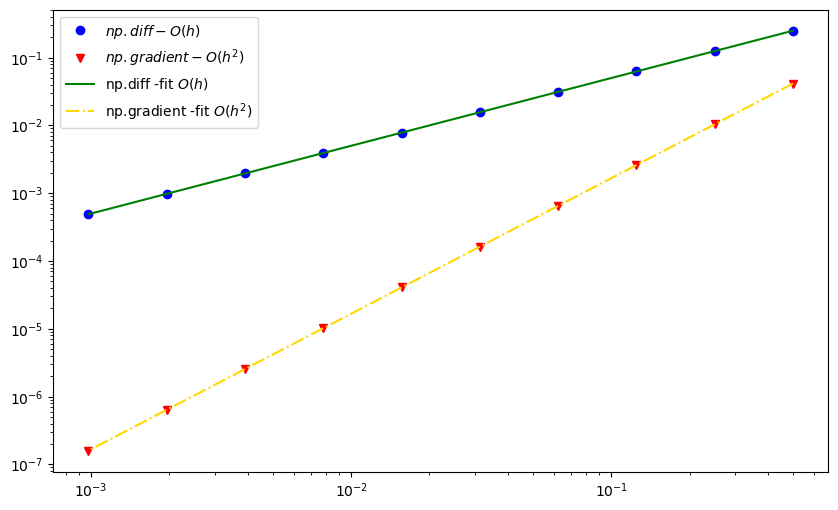

In [14]:
# produce log-log plot of max error versus step size

plt.figure(figsize = (10, 6))

plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$np.diff - O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$np.gradient -O(h^2)$')
plt.loglog(step_size, 10**fit_max_error1, linestyle = '-', c = 'green', label = r'np.diff -fit $O(h)$')
plt.loglog(step_size, 10**fit_max_error2, linestyle = '-.', c = 'gold', label = r'np.gradient -fit $O(h^2)$')

plt.legend()
plt.show()

# Differentation of data:

In [15]:
import pandas as pd

In [16]:
temp_frame = pd.read_csv("temperature-anomaly.csv")

In [20]:
#print(temp_frame)

In [21]:
tropics_data = temp_frame.loc[temp_frame["Entity"] == "Tropics"]

In [23]:
#print(tropics_data)

In [30]:
years = np.array(tropics_data["Year"])

temperatures = np.array(tropics_data["Median temperature anomaly from 1961-1990 average"])

In [32]:
print(years.shape)
print(temperatures.shape)

(170,)
(170,)


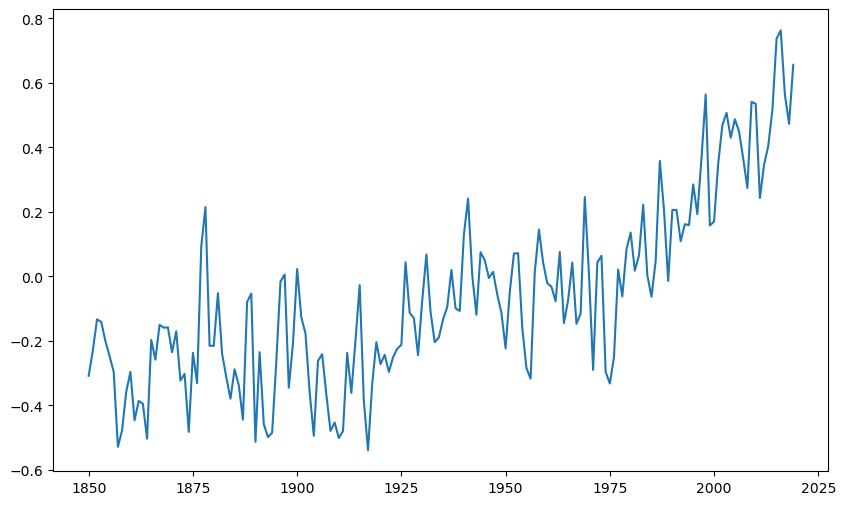

In [33]:
# Fig. environment

plt.figure(figsize = (10, 6))

plt.plot(years, temperatures)

#plt.legend()
plt.show()

In [37]:
h_year = years[1] - years[0]

print(h_year)

1


In [38]:
# forward differences
forward_diff_temp = np.diff(temperatures)/h_year 

# central differences
central_diff_temp = np.gradient(temperatures, h_year, axis=0)

## PLotting derivatives 

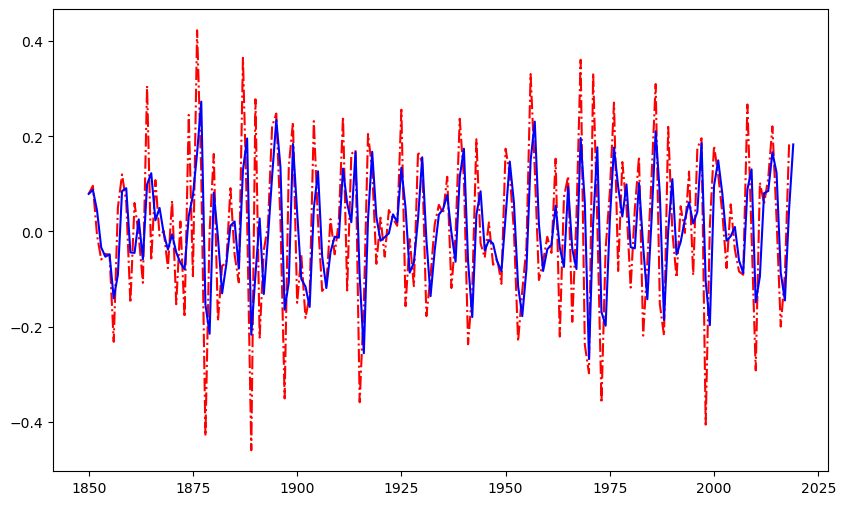

In [47]:
# Fig. environment

plt.figure(figsize = (10, 6))

plt.plot(years[:-1], forward_diff_temp, linestyle ='-.', color = 'red')

plt.plot(years, central_diff_temp, linestyle ='-', color = 'blue')

#plt.legend()
plt.show()

In [48]:
from scipy import interpolate

In [62]:
tck = interpolate.splrep(years, temperatures, s = 2)
tck2 = interpolate.splrep(years, temperatures, s = 3)
tck3 = interpolate.splrep(years, temperatures, s = 4)

In [58]:
print(tck[0])

[1850. 1850. 1850. 1850. 1861. 1872. 1875. 1878. 1880. 1881. 1883. 1888.
 1890. 1891. 1893. 1896. 1898. 1899. 1904. 1909. 1914. 1917. 1920. 1925.
 1930. 1935. 1941. 1946. 1951. 1954. 1956. 1962. 1967. 1970. 1971. 1972.
 1975. 1977. 1983. 1986. 1988. 1993. 1998. 2001. 2004. 2009. 2014. 2019.
 2019. 2019. 2019.]


In [59]:
print(tck[1])

[-2.52671178e-01 -7.02897820e-02 -8.31016840e-01  1.19832242e-01
 -5.59483777e-01  2.28240780e-01 -8.81578924e-02 -2.21839496e-01
 -4.32938268e-01 -2.20978164e-01 -2.19005971e-01 -3.87222481e-01
 -6.38340734e-01 -2.66215720e-02 -1.26477292e-01 -1.56615836e-01
 -2.38536216e-01 -6.29782536e-01 -1.11390867e-01 -4.11694163e-01
 -2.47310313e-01 -1.86152111e-01 -1.76378014e-02 -2.54030715e-01
  1.97413819e-01 -8.71062853e-02 -2.61784848e-02 -1.34566730e-01
 -8.25279282e-02  9.76240733e-02 -1.59672116e-01  4.74290663e-02
 -1.64561975e-04 -5.96172668e-02 -3.89386137e-01  1.32122693e-01
  8.31126107e-02  5.10585350e-02  2.51837547e-01  1.91619112e-02
  4.42124030e-01  2.37088147e-01  6.24968280e-01  2.28330220e-01
  5.57297603e-01  7.03530144e-01  5.69833992e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [68]:
temp_spline = interpolate.splev(years, tck, der=0)
temp_spline2 = interpolate.splev(years, tck2, der=0)
temp_spline3 = interpolate.splev(years, tck3, der=0)

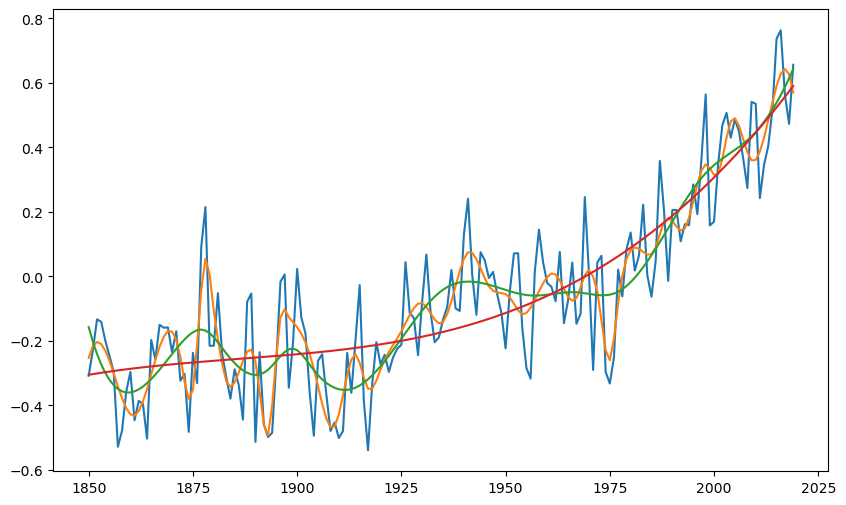

In [69]:
# Fig. environment

plt.figure(figsize = (10, 6))

plt.plot(years, temperatures)
plt.plot(years, temp_spline)
plt.plot(years, temp_spline2)
plt.plot(years, temp_spline3)

#plt.legend()
plt.show()


In [74]:
# forward differences
forward_diff_temp2 = np.diff(temp_spline2)/h_year 
forward_diff_temp3 = np.diff(temp_spline3)/h_year 

# central differences
central_diff_temp2 = np.gradient(temp_spline2, h_year, axis=0)
central_diff_temp3 = np.gradient(temp_spline3, h_year, axis=0)

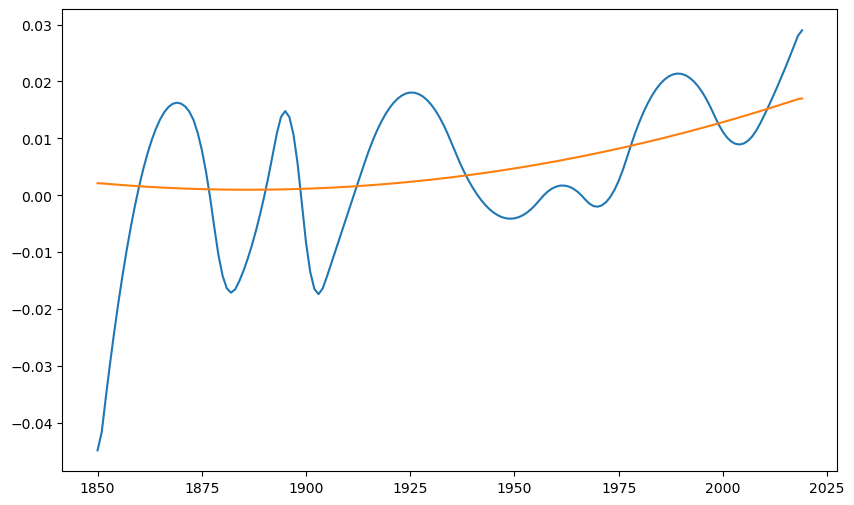

In [76]:
plt.figure(figsize = (10, 6))

#plt.plot(years, central_diff_temp)
plt.plot(years, central_diff_temp2)
plt.plot(years, central_diff_temp3)

#plt.legend()
plt.show()